# Titanic get data
In this task you will explore a dataset and run two classifiers on it - a logistic regressin and a decision tree

# Get the data

In [1]:
# used in the first time to pull the data
#!curl https://raw.githubusercontent.com/amirubin87/MA/master/Titanic.csv -o Titanic1.csv

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

/home/nbuser/anaconda3_420/lib/python3.5/site-packages/matplotlib/font_manager.py:281: UserWarning: Matplotlib is building the font cache using fc-list. This may take a moment.
  'Matplotlib is building the font cache using fc-list. '


In [3]:
df=pd.read_csv('Titanic1.csv',sep='\t')
df.head()


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


# Data exploration
## Q: what insights do you get from the below?
## Q: is there ony one sigal which is strong?
## Q: what combinations are important?
## Q: are there others things to explore? If so, explore!

### how many survived?

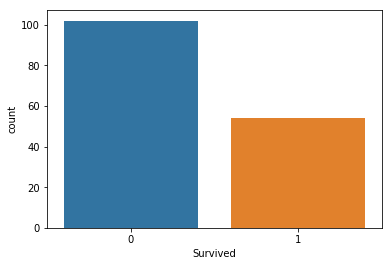

In [4]:
sns.countplot(x='Survived',data=df)

### Survived by sex

males:100
females:56


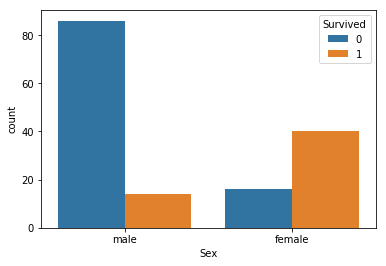

In [5]:
sns.countplot(x='Sex',hue='Survived',data=df)
print("males:" + str(len(df[df['Sex']=='male'])))
print("females:" + str(len(df[df['Sex']=='female'])))

### Survived by class

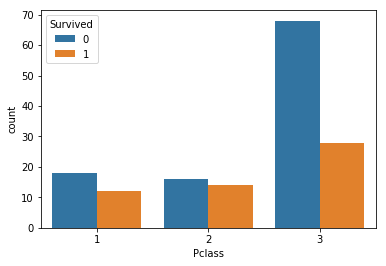

In [6]:
sns.countplot(x='Pclass',hue='Survived',data=df)

### Male survival by class

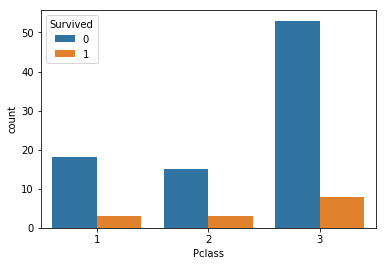

In [7]:
sns.countplot(x='Pclass', hue='Survived', data=df[df['Sex']=='male'])

### Females survival by class

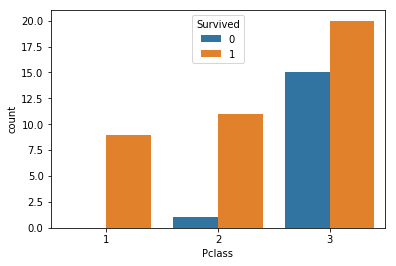

In [8]:
sns.countplot(x='Pclass', hue='Survived', data=df[df['Sex']=='female'])

# Some data completion and conversion to numbers

## Fill missing age by average per class

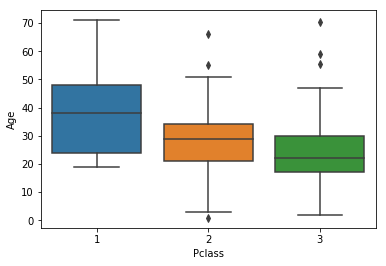

In [9]:
# first visualize the age by class
plt.figure()
sns.boxplot(x='Pclass',y='Age',data=df)

In [10]:
def impute_age(cols):
    Age = cols[0]
    Pclass = cols[1]
    
    if pd.isnull(Age):
        if Pclass == 1:
                    return 37

        elif Pclass == 2:
                    return 29
        else:
                    return 24

    else:
            return Age

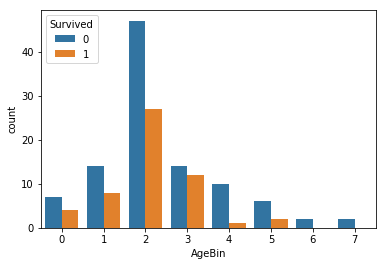

In [11]:
df['Age'] = df[['Age','Pclass']].apply(impute_age,axis=1)

# Also - lets bin the age to buckets of 10 years for east display
def toBin(age):
    return int(age/10)
df['AgeBin'] = df['Age'].apply(toBin)

# And lets check survival rates by age
sns.countplot(x='AgeBin',hue='Survived',data=df)

## Change sex to categorical for ML

In [14]:
sex = pd.get_dummies(df['Sex'],drop_first=True)

# Prepare for ML
## Take only the columns we care about
we are going to work wiht age class and sex

In [17]:
forML = df[['Survived','Age','Pclass']]
forML = pd.concat([forML,sex],axis=1)

In [19]:
forML.info()
forML.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 156 entries, 0 to 155
Data columns (total 4 columns):
Survived    156 non-null int64
Age         156 non-null float64
Pclass      156 non-null int64
male        156 non-null uint8
dtypes: float64(1), int64(2), uint8(1)
memory usage: 3.9 KB


,Survived,Age,Pclass,male
0,0,22.0,3,1
1,1,38.0,1,0
2,1,26.0,3,0
3,1,35.0,1,0
4,0,35.0,3,1


In [20]:
forML.columns

Index(['Survived', 'Age', 'Pclass', 'male'], dtype='object')

## Split to train-test

In [21]:
from sklearn.model_selection import train_test_split
# note that setting the "random_state" makes this always the same, so its good if we experiment several times.
X_train, X_test, y_train, y_test = train_test_split(forML.drop('Survived',axis=1), 
                                                    forML['Survived'], test_size=0.30, 
                                                    random_state=101)


# Logistic regression model

In [25]:
from sklearn.linear_model import LogisticRegression
logmodel = LogisticRegression(penalty='l1',# l2 and l2 
                              solver='liblinear', 
                              max_iter=50,)
result = logmodel.fit(X_train,y_train)


In [26]:
from sklearn import svm, datasets
from sklearn import metrics
import matplotlib.pyplot as plt
probs = logmodel.predict_proba(X_test)
preds = probs[:,1]
preds

array([0.10814731, 0.55218689, 0.21848481, 0.15268566, 0.56492583,
       0.11151469, 0.52222372, 0.10486961, 0.12196832, 0.11842616,
       0.58990327, 0.64650982, 0.0791279 , 0.23785667, 0.11151469,
       0.2139465 , 0.13171095, 0.64650982, 0.08138429, 0.54768986,
       0.55644167, 0.11151469, 0.13773304, 0.59820955, 0.58177585,
       0.64256403, 0.18655136, 0.11151469, 0.12196832, 0.16867774,
       0.6126082 , 0.11151469, 0.1149734 , 0.53509739, 0.14804347,
       0.12013591, 0.59820955, 0.62299785, 0.59820955, 0.56492583,
       0.12591371, 0.60256878, 0.09857658, 0.10814731, 0.11151469,
       0.11151469, 0.48755927])

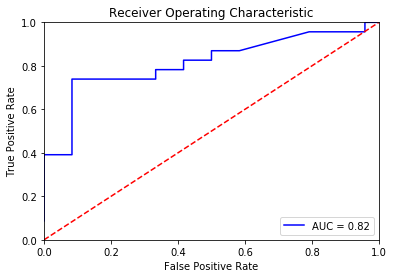

In [27]:
fpr, tpr, threshold = metrics.roc_curve(y_test, preds)
roc_auc = metrics.auc(fpr, tpr)

# method I: plt
import matplotlib.pyplot as plt
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

### Q: What do you think?

## Coeffiecnt analysis

In [28]:
for i in range(len(logmodel.coef_[0])):    
    print(X_train.columns[i])
    print("coeff: " + str(logmodel.coef_[0][i]))
    print("2^coeff: " + str(2.0**(logmodel.coef_[0][i])))

# coeff == 0 - no impact. (2^coeff ==1)
# Coeff >>0 - positive impact (2^coeff >1)
# Coeff <<0 - negative impact (2^coeff <1)

Age
coeff: 0.017222445866310193
2^coeff: 1.0120092283985336
Pclass
coeff: -0.05072025726310225
2^coeff: 0.9654542110842734
male
coeff: -2.3365397581101743
2^coeff: 0.19798461652972382


### Q: does the above make sense? Try to write in words whay it means.

# DecisionTree model

In [41]:
from sklearn.tree import DecisionTreeClassifier
clf = DecisionTreeClassifier(random_state=0, max_depth=10,min_samples_leaf=1)
result = clf.fit(X_train, y_train)

In [42]:
print(clf.feature_importances_)
for i in range(len(clf.feature_importances_)):    
    print(X_train.columns[i])
    print(clf.feature_importances_[i])

[0.49939971 0.13593905 0.36466124]
Age
0.4993997099394322
Pclass
0.1359390513505792
male
0.36466123870998857


In [43]:
#!pip install pydotplus

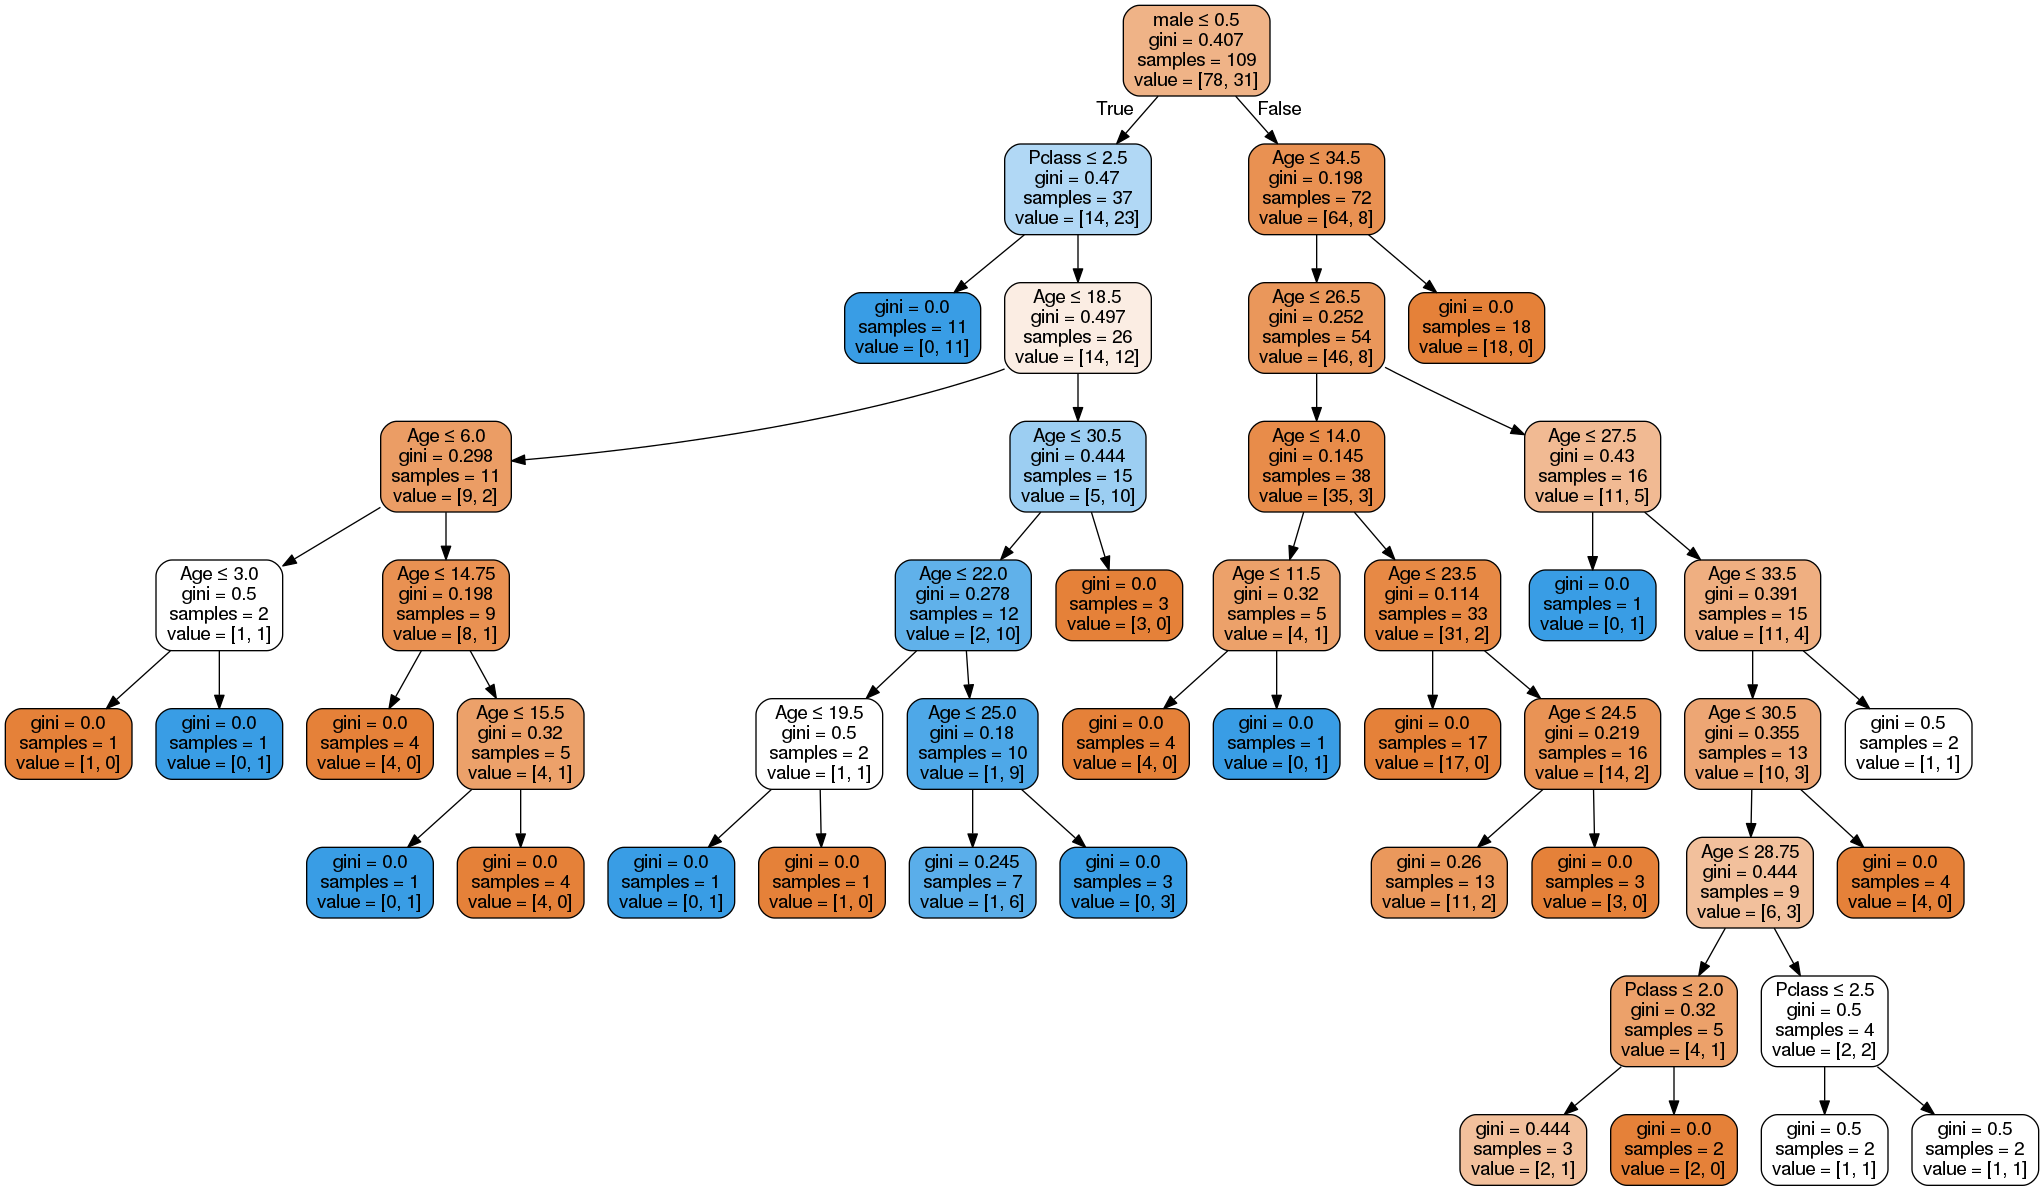

In [44]:
# https://stackoverflow.com/questions/18438997/why-is-pydot-unable-to-find-graphvizs-executables-in-windows-8
from sklearn.externals.six import StringIO  
from IPython.display import Image  
from sklearn.tree import export_graphviz
import pydotplus

dot_data = StringIO()

export_graphviz(clf, out_file=dot_data,
            feature_names=X_train.columns,
                filled=True, rounded=True,
                special_characters=True)

graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
Image(graph.create_png())

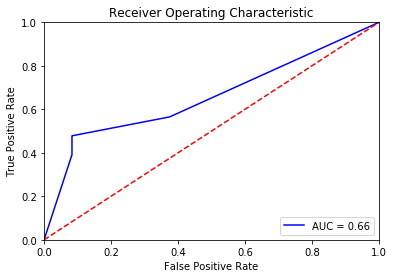

In [45]:
from sklearn import svm, datasets
from sklearn import metrics
import matplotlib.pyplot as plt
probs = clf.predict_proba(X_test)
preds = probs[:,1]
fpr, tpr, threshold = metrics.roc_curve(y_test, preds)
roc_auc = metrics.auc(fpr, tpr)

# method I: plt
import matplotlib.pyplot as plt
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [87]:

from sklearn.tree import _tree

def tree_to_code(tree, feature_names):
    tree_ = tree.tree_
    feature_name = [
        feature_names[i] if i != _tree.TREE_UNDEFINED else "undefined!"
        for i in tree_.feature
    ]
    #print ("def tree({}):".format(", ".join(feature_names)))

    def recurse(node, depth):
        indent = "  " * depth
        if tree_.feature[node] != _tree.TREE_UNDEFINED:
            name = feature_name[node]
            threshold = tree_.threshold[node]
            print ("{}if {} <= {}:".format(indent, name, threshold))
            recurse(tree_.children_left[node], depth + 1)
            print ("{}else:  # if {} > {}".format(indent, name, threshold))
            recurse(tree_.children_right[node], depth + 1)
        else:
            print ("{}return {}".format(indent, tree_.value[node]))

    recurse(0, 1)
    
tree_to_code(clf,['age','pClass','isMale'])

  if isMale <= 0.5:
    if pClass <= 2.5:
      return [[ 0. 11.]]
    else:  # if pClass > 2.5
      if age <= 18.5:
        return [[9. 2.]]
      else:  # if age > 18.5
        return [[ 5. 10.]]
  else:  # if isMale > 0.5
    if age <= 34.5:
      if age <= 26.5:
        return [[35.  3.]]
      else:  # if age > 26.5
        return [[11.  5.]]
    else:  # if age > 34.5
      return [[18.  0.]]


### Q:  Play around with the tree max_depth hyper-param, what AUC do you get? Why? (Try 10 and 1 values)